# Source

This Colab is based on documets from the TensorFlow Authors (Copyright 2019). This file was modified by Denis Jacob Machado (dmachado@uncc.edu) for educational purposes only. Please do not share.

In [1]:
#@title Licensed under the Apache License, Version 2.0 (the "License");
# you may not use this file except in compliance with the License.
# You may obtain a copy of the License at
#
# https://www.apache.org/licenses/LICENSE-2.0
#
# Unless required by applicable law or agreed to in writing, software
# distributed under the License is distributed on an "AS IS" BASIS,
# WITHOUT WARRANTIES OR CONDITIONS OF ANY KIND, either express or implied.
# See the License for the specific language governing permissions and
# limitations under the License.

# Introduction

This tutorial is about convolutional neural networks (CNN), which are part of deep learning. Before we run the code, we shall first take a (somewhat superficial) look into some key concepts that help us understand what is going on under the hood in a CNN program.

## First, what are neural networks?

**Neural networks**, also known as artificial neural networks (ANNs) or simulated neural networks (SNNs), are a subset of machine learning and are at the heart of deep learning algorithms. Their name and structure are inspired by the human brain, mimicking the way that biological neurons signal to one another.

Artificial neural networks (ANNs) are comprised of a **node layers**, containing an **input layer**, one or more **hidden layers**, and an **output layer**.

Each node, or artificial **neuron**, connects to another and has an associated **weight** and **threshold**.

If the output of any individual node is above the specified threshold value, that node is **activated**, sending data to the next layer of the network. Otherwise, no data is passed along to the next layer of the network.


## Is deep learning the same as a neural networks?

**Deep learning** refers to training **neural networks** with more than two non-output layers.

Deep Learning and neural networks tend to be used interchangeably in conversation, which can be confusing. As a result, it’s worth noting that the "deep" in deep learning is just referring to the depth of layers in a neural network. A neural network that consists of more than three layers (which would be inclusive of the inputs and the output) can be considered a deep learning algorithm. A neural network that only has two or three layers is just a basic neural network.

To understand the place of deep learning in artificial intelligence, think of it as a nested Venn diagram in which artificial inteligence contains machine learning. Machine learing contains neural networks. Neural networks contain deep learning.

Currently, one of the main bottlenecks in producing a deep learning algorithm is the **vaishing gradient**.

## What is the vanishing gradient and how do we fix it?

To update the values of the parameters in neural networks, we commonly apply an algorithm called **backpropagation**.

Most deep neural networks are **feed-forward**, meaning they flow in one direction only, from input to output. However, you can also train your model through backpropagation; that is, move in the opposite direction from output to input. Backpropagation allows us to calculate and attribute the error associated with each neuron, allowing us to adjust and fit the parameters of the model(s) appropriately.

But what is the vanishing gradient exactly, and how does backpropagation helps solving this problem?

During **gradient descent**, the neural network's parameters receive an update proportion to the partial derivate of the cost function with respect to the current parameter in each iteraction of training. The problem is that, in some cases, the gradient will be **vanishingly small**, effectively preventing some parameters from changing their value. In the worst case, this may completely stop the neural network from further training.

Backpropagation allows us to calculate and attribute the error associated with each neuron, allowing us to adjust and fit the parameters of the model(s) appropriately. Together with other cool tricks like **ReLU** and **LSTM** helps creating deep learning algorithms with more layers (up to hundreds od layers).

## Okay, but what are these ReLU and LSTM things?

- ReLU: The **rectified linear activation function** (ReLU) is a piecewise linear function that will output the input directly if it is positive, otherwise, it will output zero. It has become the default activation function for many types of neural networks because a model that uses it is easier to train and often achieves better performance than, for example, the signoid function (logistic regression).
- LSTM: **long short-term memory** (LSTM) networks are a type of recurrent neural network capable of learning order dependence in sequence prediction problems. This is a behavior required in complex problem domains like machine translation, speech recognition, and more.

# References

- Burkov, A. (2019) **The Hundred-Page Machine Learning Book**. ISBN 978-1-9995795-0-0.
- IBM (2020) **Neural networks**. Available from https://www.ibm.com/cloud/learn/neural-networks, last accessed on October 15, 2022.

# CNN tutorial using the Keras Sequential API

<table class="tfo-notebook-buttons" align="left">
  <td>
    <a target="_blank" href="https://www.tensorflow.org/tutorials/images/cnn">
    <img src="https://www.tensorflow.org/images/tf_logo_32px.png" />
    View on TensorFlow.org</a>
  </td>
  <td>
    <a target="_blank" href="https://colab.research.google.com/github/tensorflow/docs/blob/master/site/en/tutorials/images/cnn.ipynb">
    <img src="https://www.tensorflow.org/images/colab_logo_32px.png" />
    Run original Colab</a>
  </td>
  <td>
    <a target="_blank" href="https://github.com/tensorflow/docs/blob/master/site/en/tutorials/images/cnn.ipynb">
    <img src="https://www.tensorflow.org/images/GitHub-Mark-32px.png" />
    View source on GitHub</a>
  </td>
  <td>
    <a href="https://storage.googleapis.com/tensorflow_docs/docs/site/en/tutorials/images/cnn.ipynb"><img src="https://www.tensorflow.org/images/download_logo_32px.png" />Download original notebook</a>
  </td>
</table>

This tutorial demonstrates training a simple [Convolutional Neural Network](https://developers.google.com/machine-learning/glossary/#convolutional_neural_network) (CNN) to classify [CIFAR images](https://www.cs.toronto.edu/~kriz/cifar.html). Because this tutorial uses the [Keras Sequential Application Programming Interface (API)](https://www.tensorflow.org/guide/keras/overview), creating and training your model will take just a few lines of code.

**APIs** let your product or service communicate with other products and services without having to know how they’re implemented. This can simplify app development, saving time and money. When you’re designing new tools and products—or managing existing ones—APIs give you flexibility; simplify design, administration, and use; and provide opportunities for innovation.

APIs are sometimes thought of as contracts, with documentation that represents an agreement between parties: If party 1 sends a remote request structured a particular way, this is how party 2’s software will respond.

Again, it is because of the Keras Sequential API that we don't need a lot of lines of code to produce our CNN.

## 1) Import TensorFlow

In [2]:
# TensorFlow is an end-to-end machine learning platform that helps you find solutions to accelerate machine learning tasks at every stage of your workflow:
import tensorflow as tf

# To leverage the power of the Keras Sequential API (the datasets come from here):
from tensorflow.keras import datasets, layers, models

# For visualization:
import matplotlib.pyplot as plt

## 2) Download and prepare the CIFAR10 dataset


- The CIFAR10 dataset contains 60,000 color images in 10 classes, with 6,000 images in each class.
- The dataset is divided into 50,000 training images and 10,000 testing images.
- The classes are mutually exclusive and there is no overlap between them.

In [3]:
# Loads the CIFAR10 dataset:
(train_images, train_labels), (test_images, test_labels) = datasets.cifar10.load_data()

# Normalize pixel values to be between 0.0 and 1.0 (255.0 is the maximum pixel size):
train_images, test_images = train_images / 255.0, test_images / 255.0

170498071/170498071 [==============================] - 7s 0us/step


## 3) Verify the data

To verify that the dataset looks "correct" (or at least to see if we can find any "red flags"), let's plot the first 25 images from the training set and display the class name below each image:


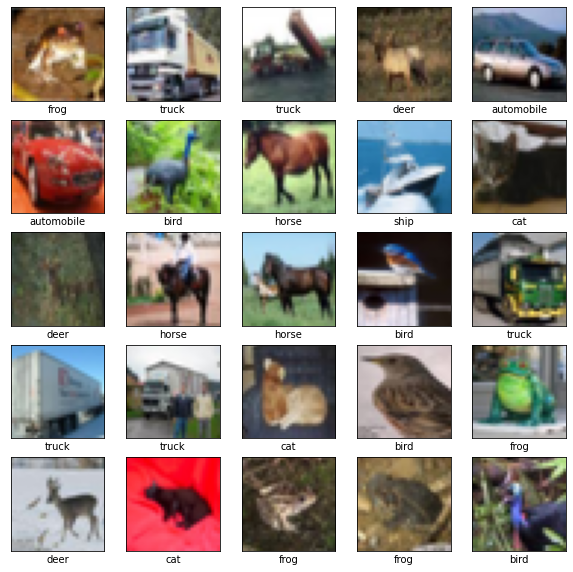

In [4]:
# First, we name the classes (note that the order matters in here, because this is a list):
class_names = ['airplane', 'automobile', 'bird', 'cat', 'deer',
               'dog', 'frog', 'horse', 'ship', 'truck']

plt.figure(figsize=(10,10)) # This comes from matplotlib.pyplot

for i in range(25): # This for loop is how we get the first 25 images
    plt.subplot(5, 5, i+1) # The position of the subplot defined by nrows, ncols, and index
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_images[i])
    plt.xlabel(class_names[train_labels[i][0]]) # The CIFAR labels happen to be arrays, which is why you need the extra index

plt.show()

Take a moment to look into every image and ask whether their labels seem correct. Do not proceed if you see a bad label.

## 4) Create the convolutional base

The 6 lines of code below define the convolutional base using a common pattern: a stack of [Conv2D](https://www.tensorflow.org/api_docs/python/tf/keras/layers/Conv2D) and [MaxPooling2D](https://www.tensorflow.org/api_docs/python/tf/keras/layers/MaxPool2D) layers.

- **Conv2D:** 2D convolution layer (e.g. spatial convolution over images). In deep learning, a convolutional neural network (CNN or **ConvNet**) is a class of deep neural networks, that are typically used to recognize patterns present in images but they are also used for spatial data analysis, computer vision, natural language processing, signal processing, and various other purposes
- **MaxPooling2D:** Max pooling operation for 2D spatial data. In deep learning, max pooling is a type of operation that is typically added to convolutional neural networks following individual convolutional layers. When added to a network, max pooling reduces the size of images by reducing the number of pixels in the output from the previous convolutional layer.

As input, a CNN takes tensors of shape (`image_height`, `image_width`, `color_channels`), ignoring the batch size. If you are new to these dimensions, `color_channels` refers to (R,G,B). In this example, you will configure your CNN to process inputs of shape (32, 32, 3), which is the format of CIFAR images. You can do this by passing the argument `input_shape` to your first layer.

Note that you would need to have background information about these figures before hand to be able to pass on the appropriate parameters below (but we will focus on how to run the CNN instead on the dataset itself).

In [5]:
# First, qe use Sequential to group a linear stack of layers into a tf.keras.Model:
model = models.Sequential()

# Second, we need those layers, so we start adding them:
model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3)))
model.add(layers.MaxPooling2D((2, 2))) # Note that we always put a MaxPooling2D layers between two Conv2D layers
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))

Let's display the architecture of your model so far:

In [6]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 30, 30, 32)        896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 15, 15, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 13, 13, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 6, 6, 64)         0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 4, 4, 64)          36928     
                                                                 
Total params: 56,320
Trainable params: 56,320
Non-traina

### 4.1) What did we do?

We called `model.summary()` to print a useful summary of the model, which includes:

- Name and type of all layers in the model.
- Output shape for each layer.
- Number of weight parameters of each layer.
- If the model has general topology, the inputs each layer receives.
- The total number of trainable and non-trainable parameters of the model.

Note that the Output Shape may contain a `null`. Null values in the output shapes of the layers are a reminder that the model expects the input to have a batch size as the outermost dimension, which in this case can be flexible due to the null value.

### 4.2) What happened?

Above, you can see that the output of every Conv2D and MaxPooling2D layer is a 3D **tensor** of shape (height, width, channels).

The width and height dimensions tend to shrink as you go deeper in the network

The number of output channels for each Conv2D layer is controlled by the first argument (e.g. 32 or 64).

Typically,  as the width and height shrink, you can afford (computationally) to add more output channels in each Conv2D layer.


## 5) Add dense layers on top

To complete the model, you will feed the last output tensor from the convolutional base (of shape (4, 4, 64)) into one or more **Dense layers** to perform classification.

Dense layers take vectors as input (which are 1D), while the current output is a 3D tensor.

First, you will flatten (or unroll) the 3D output to 1D,  then add one or more Dense layers on top.

CIFAR has 10 output classes, so you use a final Dense layer with 10 outputs.

In [7]:
model.add(layers.Flatten()) # Flattens the 3D output to 1D
model.add(layers.Dense(64, activation='relu')) # Add a Dense layer
model.add(layers.Dense(16)) # As another Dense layer
model.add(layers.Dense(10)) # As another Dense layer

### 5.1) Dense layers

- `tf.keras.layers.Dense`: Just your regular densely-connected NN layer. Dense layer is the regular deeply connected neural network layer. It is most common and frequently used layer.

### 5.2) Summary

Here's the complete architecture of your model:

In [8]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 30, 30, 32)        896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 15, 15, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 13, 13, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 6, 6, 64)         0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 4, 4, 64)          36928     
                                                                 
 flatten (Flatten)           (None, 1024)              0

The network summary shows that (4, 4, 64) outputs were flattened into vectors of shape (1024) before going through two Dense layers (`dense`and `dense_1`).

## 6) Compile and train the model

Here are some important functions that you should know before we move foward:

- `tf.keras.Model`: `Model` groups layers into an object with training and inference features.
- `model.compile()`: Once the model is created, you can config the model with losses and metrics with `model.compile()`.
- `model.fit()`: train the model.
- `model.predict()`: use the model to do prediction (we don't use this in this subsection, but it is good to know).


In [9]:
# First you configure the model:
model.compile(optimizer='adam', # Optimizer that implements something called the Adam algorithm.
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True), # Computes the crossentropy loss between the labels and predictions. The from_logits part defines whether y_pred is expected to be a logits tensor. By default, we assume that y_pred encodes a probability distribution.
              metrics=['accuracy']) # Calculates how often predictions equal labels.

# Second you train the model (you cannot make predictions without first running the training):
history = model.fit(train_images, train_labels, epochs=10, 
                    validation_data=(test_images, test_labels)) # Don't get confused with naming: sometimes people call the test data the validation data. Note that the test data is predefined and comes from Keras.

Epoch 1/10
1563/1563 [==============================] - 16s 5ms/step - loss: 1.4868 - accuracy: 0.4556 - val_loss: 1.2419 - val_accuracy: 0.5508
Epoch 2/10
1563/1563 [==============================] - 7s 5ms/step - loss: 1.1210 - accuracy: 0.6032 - val_loss: 1.0727 - val_accuracy: 0.6149
Epoch 3/10
1563/1563 [==============================] - 7s 5ms/step - loss: 0.9598 - accuracy: 0.6626 - val_loss: 0.9606 - val_accuracy: 0.6664
Epoch 4/10
1563/1563 [==============================] - 8s 5ms/step - loss: 0.8537 - accuracy: 0.6998 - val_loss: 0.9073 - val_accuracy: 0.6865
Epoch 5/10
1563/1563 [==============================] - 8s 5ms/step - loss: 0.7752 - accuracy: 0.7256 - val_loss: 0.9163 - val_accuracy: 0.6894
Epoch 6/10
1563/1563 [==============================] - 8s 5ms/step - loss: 0.7099 - accuracy: 0.7496 - val_loss: 0.8525 - val_accuracy: 0.7105
Epoch 7/10
1563/1563 [==============================] - 8s 5ms/step - loss: 0.6589 - accuracy: 0.7667 - val_loss: 0.8647 - val_accuracy

## 7) Evaluate the model

In here we are using `matplotlib.pyplot` (that we imported as `plt`) to see what our deep learning algorithm is doing.

In here, the model evaluation is based on two values: **accuracy** (`accuracy`) and **validation accuracy** (`val_accuracy`).

When training a machine learning model, one of the main things you want to avoid is **overfitting**. Overfitting is when your model fits the training data well but cannot generalize and make accurate predictions for data it has not seen before.

Data scientists use a **cross-validation** technique to determine if their model is overfitting, splitting their data into two parts: the **training** and **testing** set. But note that scientists can also employ a **validation** set to help with model selection.

Scientists use the training set to train the model and the testing set to evaluate the model's performance. Metrics on the training set let you see how your model is progressing in terms of its training. Still, it's metrics on the testing set that let you measure the quality of your model (that is, how well it's able to make new predictions based on data it hasn't seen before).

While accuracy measures the `accuracy` in the training set, `val_accuracy` measure accuracy in the testing set. Some people call the testing set the validation set, which is why that variable is named `val_accuracy` and not `test_accuracy`.

Besides the accuracy, we are also calculating the **loss**. The loss is very important in machine learning or deep learning as it helps evaluating how well your algorithm is modeling your dataset.

To calculate the loss, a loss or **cost function** is used. There are several different cost functions to use. Each penalizes errors in different ways, and the problem determines which one is better to use. Cross-Entropy and Mean Squared Error are the most commonly used for classification and regression problems, respectively.

But how do we know if the loss is high or low?  Well, it depends on the problem and the cost function being used. Let’s say we want to predict the color of a pixel, for whatever reason. For simplicity, let’s assume the value of a pixel can go from 0 to 255. We use the **Mean Squared Error** as our cost function. In this example, having a loss of 1 would be tiny, while a loss of 100 would be really high. However, whether the loss is high or low is not the most important inference we can learn from it. If we plot loss results over time, we can see whether our model is learning, and how fast.

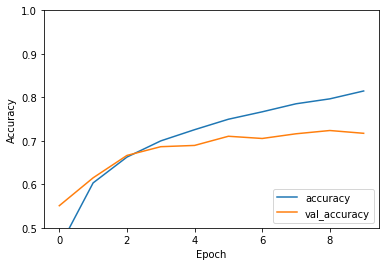

In [10]:
# Plot training (blue) and testing (orange) accuracy:
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label = 'val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0.5, 1])
plt.legend(loc='lower right')

In [11]:
# Get the lass oand accuracy for the testing set:
test_loss, test_acc = model.evaluate(test_images, test_labels, verbose=2)

313/313 - 1s - loss: 0.8834 - accuracy: 0.7173 - 776ms/epoch - 2ms/step


In [12]:
print("The testing loss is {} and its accuracy is {}.".format(test_loss, test_acc))

The testing loss is 0.8833650350570679 and its accuracy is 0.7172999978065491.


Your simple CNN has achieved a test accuracy of over 70%. Not bad for a few lines of code! For another CNN style, check out the [TensorFlow 2 quickstart for experts](https://www.tensorflow.org/tutorials/quickstart/advanced) example that uses the Keras subclassing API and `tf.GradientTape`.

# CHALLENGE

Use the space below to plot the history of the loss during the training of this CNN model and explain (in two pragraps or less) how we can interpret the results of the loss function in this example.

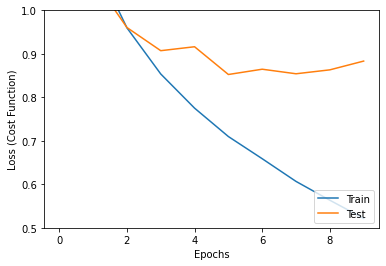

In [13]:
# ENTER OUR CODE HERE
# You don't need to code everything from scratch. Instead, just leverage the code above and continue from there.

# Plot training (blue) and testing (orange) loss:
plt.plot(history.history['loss'], label='Train')
plt.plot(history.history['val_loss'], label = 'Test')
plt.xlabel('Epochs')
plt.ylabel('Loss (Cost Function)')
plt.ylim([0.5, 1])
plt.legend(loc='lower right')

*ENTER YOUR TEXT HERE.
Use this space to 1) describe the data plot that was generated so that a reader would be able to understand it without seeing the image and 2) state what you learned from the loss function.*

❗❗❗
**IMPORTANT:** Study this notebook (named MaLeBi_Fall2022_CNN.ipynb) and work on its challenge (above). To complete the challenge and Classroom Quiz 6 (available in CANVAS) you must save this notebook as an ipynb file with the prefix Malebi_Quiz5_ followed by your last name. Next, upload it as your answer to the last question on Classroom Quiz 6.
❗❗❗